<a href="https://colab.research.google.com/github/srujanay18/clustering_assignment/blob/main/A5_clustering_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Completing Q1 + Q2

# Q1. This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking k.

Run the code below, which creates four datasets: df0_125, df0_25, df0_5, df1_0, and df2_0. Each data set is created by increasing the amount of noise (standard deviation) around the cluster centers, from 0.125 to 0.25 to 0.5 to 1.0 to 2.0.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

```

Make scatterplots of the (X1, X2) points by group for each of the datasets. As the noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

Create a scree plot for each of the datasets. Describe how the level of noise affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a k. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)

Explain the intuition of the elbow, using this numerical simulation as an example.

In [11]:
import numpy as np
import pandas as pd

def createData(noise, N=50):
    np.random.seed(100)
    X1 = np.array([np.random.normal(1, noise, N),  np.random.normal(1, noise, N)])
    X2 = np.array([np.random.normal(3, noise, N),  np.random.normal(2, noise, N)])
    X3 = np.array([np.random.normal(5, noise, N),  np.random.normal(3, noise, N)])
    gdf1 = pd.DataFrame({'x1': X1[0, :], 'x2': X1[1, :], 'group': 'a'})
    gdf2 = pd.DataFrame({'x1': X2[0, :], 'x2': X2[1, :], 'group': 'b'})
    gdf3 = pd.DataFrame({'x1': X3[0, :], 'x2': X3[1, :], 'group': 'c'})
    return pd.concat([gdf1, gdf2, gdf3], axis=0).reset_index(drop=True)

df0_125 = createData(0.125)
df0_25  = createData(0.25)
df0_5   = createData(0.5)
df1_0   = createData(1.0)
df2_0   = createData(2.0)

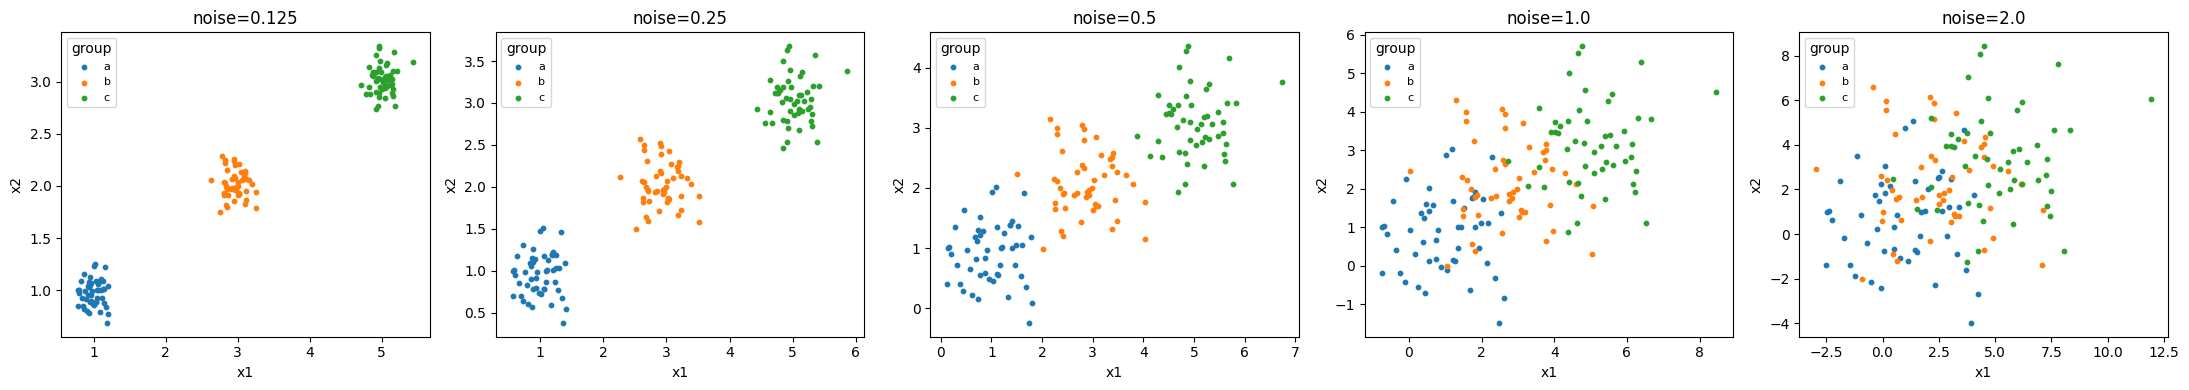

In [12]:
import matplotlib.pyplot as plt

datasets = [
    ("noise=0.125", df0_125),
    ("noise=0.25",  df0_25),
    ("noise=0.5",   df0_5),
    ("noise=1.0",   df1_0),
    ("noise=2.0",   df2_0),
]

fig, axes = plt.subplots(1, 5, figsize=(22, 4))
for ax, (title, d) in zip(axes, datasets):
    for g, gdf in d.groupby("group"):
        ax.scatter(gdf["x1"], gdf["x2"], s=10, label=g)
    ax.set_title(title)
    ax.set_xlabel("x1"); ax.set_ylabel("x2")
    ax.legend(title="group", fontsize=8)
plt.tight_layout()
plt.show()

As the noise level increases from 0.125 to 2.0, the visual distinctness of the clusters decreases significantly; the cluster formations are not as distinctive or separated, but rather clump into one and heavily overlap, making it very hard to identify separate clusters. This means that the higher noise levels have more variability within each group, which causes the points to be further away from their respective cluster centers and closer to points from other clusters.

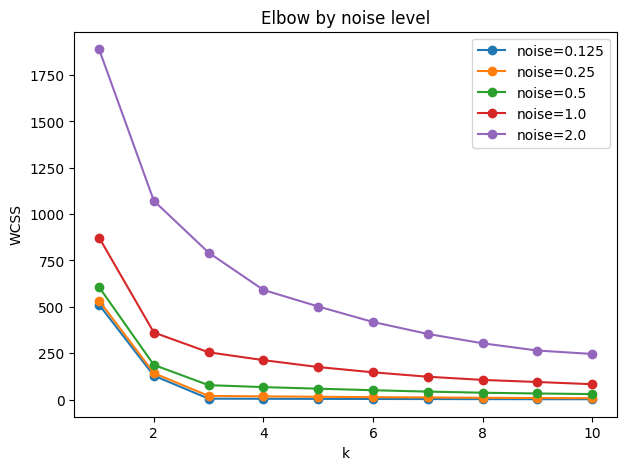

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def scree_wcss(df, kmax=10):
    X = df[["x1", "x2"]].to_numpy()
    wcss = []
    for k in range(1, kmax + 1):
        km = KMeans(n_clusters=k, n_init=10, random_state=0)
        km.fit(X)
        wcss.append(km.inertia_)
    return wcss

kmax = 10
plt.figure(figsize=(7,5))
for title, d in datasets:
    w = scree_wcss(d, kmax)
    plt.plot(range(1, kmax+1), w, marker="o", label=title)
plt.xlabel("k"); plt.ylabel("WCSS"); plt.title("Elbow by noise level")
plt.legend()
plt.show()

# Analysis of level of noise affecting scree plots + ability to definitively select a k
The scree plots show that as the noise level in the data increases, the "elbow" in the plot becomes less noticeable/distinct. This makes it harder to determine the best number of k clusters using the elbow method. With low noise (0.125), a clear elbow is present at k=3. As noise increases (up to 2.0), the curve smooths out, and the elbow becomes less distinct or completely disappears. This shows how noise impacts the effectiveness of the elbow method for selecting k in K-Means clustering.

# Intuition of the Elbow
The elbow method is based on the idea that as the number of clusters k increases, the within-cluster sum of squares will decrease. This is because the data points will be closer to their assigned cluster centers. However, adding more clusters past the true number of clusters doesnt help decrease/reduce the within-cluster sum of squares. In the code above, with low noise, the data points form three distinct groups, so adding clusters beyond k=3 doesn't significantly reduce the within-cluster distance. This creates a clear elbow at k=3. As noise increases, the clusters become less distinct and more spread out, making the decrease in within-cluster distance more gradual as k increases. The smoothing out of the decrease gets rid of the distinct elbow, making it harder to identify the optimal k.

# Q2. This question is a case study on clustering.

Load the 2022 election cycle fundraising.csv file in the ./data folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, Raised, the total amount they spent, Spent, their available Cash on Hand, and their Debts. The variables denominated in dollars are messy and require cleaning. How do you handle it?

Max-min normalize Raised and Spent. Use a scree plot to determine the optimal number of clusters for the means clustering algorithm. Make a scatter plot of Raised against Spent and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.

Repeat part 2, but for Cash on Hand and Debts. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.

Use k means clustering with all four numeric variables. How do your results compare to the previous two parts?

Did the k-MC algorithm find useful patterns for you in analyzing the election?

In [20]:
import pandas as pd
import numpy as np
import re

# load
raw = pd.read_csv("/content/2022 election cycle fundraising.csv")

# pick a readable name column if present
name_col = next((c for c in raw.columns if any(k in c.lower() for k in ["candidate", "name"])), None)

# map the four money fields by substring (case-insensitive)
want = ["Raised","Spent","Cash on Hand","Debts"]
colmap = {w: next(c for c in raw.columns if w.lower() in c.lower()) for w in want}

# clean $-strings -> float (handle parentheses negatives)
def money(x):
    if pd.isna(x): return np.nan
    s = str(x).strip()
    neg = s.startswith("(") and s.endswith(")")
    s = re.sub(r"[^0-9.\-]", "", s)
    v = float(s) if s else np.nan
    return -v if neg else v

df = pd.DataFrame()
if name_col: df["Name"] = raw[name_col]
for k, v in colmap.items():
    df[k] = raw[v].apply(money)

work = df.copy()
print(work.head())


       Raised       Spent  Cash on Hand  Debts
0   7719396.0   7449678.0      851851.0    0.0
1   2192741.0   1243502.0     2472888.0    0.0
2  20993041.0  13957854.0    20942888.0    0.0
3   1211111.0   1173466.0      623472.0    0.0
4   1617611.0   1664674.0     1098579.0    0.0


I handled the cleaning process by stripping characters, treating parentheses as negatives, and casting to float.

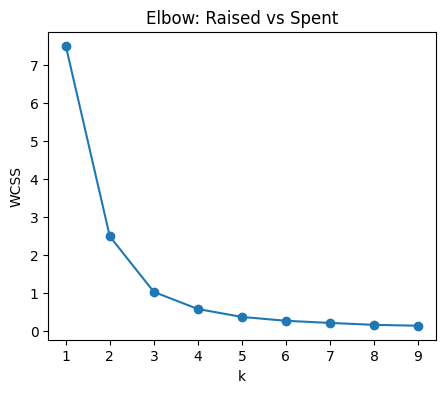

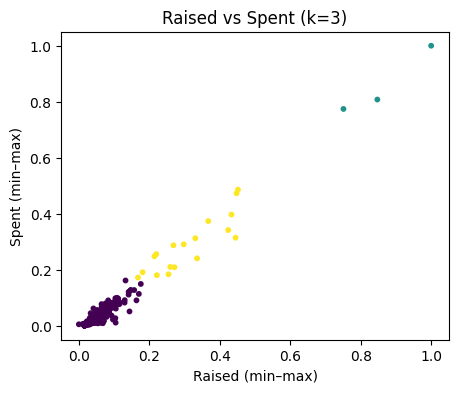

Name column not found; clusters listed by row index only.
Cluster 1 — size 3 | rows: [340, 417, 523]
Cluster 2 — size 18 | rows: [2, 87, 89, 115, 261, 290, 298, 326, 328, 357, 390, 402, 414, 442, 476, 490, 499, 500]


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd

xy = work[["Raised","Spent"]].dropna()
scaler_rs = MinMaxScaler()
X = scaler_rs.fit_transform(xy)

# scree (WCSS)
Ks = range(1, 10)
wcss = []
for k in Ks:
    wcss.append(KMeans(n_clusters=k, n_init=10, random_state=0).fit(X).inertia_)

plt.figure(figsize=(5,4))
plt.plot(list(Ks), wcss, marker="o")
plt.xlabel("k"); plt.ylabel("WCSS"); plt.title("Elbow: Raised vs Spent")
plt.show()

# choose k from the elbow (notes typically land on 3)
k_rs = 3

km = KMeans(n_clusters=k_rs, n_init=10, random_state=0).fit(X)
labels = km.labels_

plt.figure(figsize=(5,4))
plt.scatter(X[:,0], X[:,1], c=labels, s=10)
plt.xlabel("Raised (min–max)"); plt.ylabel("Spent (min–max)")
plt.title(f"Raised vs Spent (k={k_rs})")
plt.show()

# list politicians in the two smallest clusters
label_s = pd.Series(labels, index=xy.index, name="cluster")
sizes = label_s.value_counts().sort_values()
smallest_two = list(sizes.index[:2])

if "Name" in work.columns:
    name_series = work["Name"].astype(str)
    for cid in smallest_two:
        idx = label_s.index[label_s == cid]
        members = name_series.reindex(idx).dropna().tolist()
        print(f"Cluster {cid} — size {len(members)}")
        for m in members:
            print(" -", m)
else:
    print("Name column not found; clusters listed by row index only.")
    for cid in smallest_two:
        idx = label_s.index[label_s == cid]
        print(f"Cluster {cid} — size {len(idx)} | rows: {list(idx)}")

The scree plot showed a clear elbow at k ≈ 3, so I used k=3. The scatterplot splits candidates into: a large low-money group, a mid-tier group, and a tiny set of extreme outliers with very high Raised and Spent. The list of politicians that comprise of the two smallest clusters are shown above.

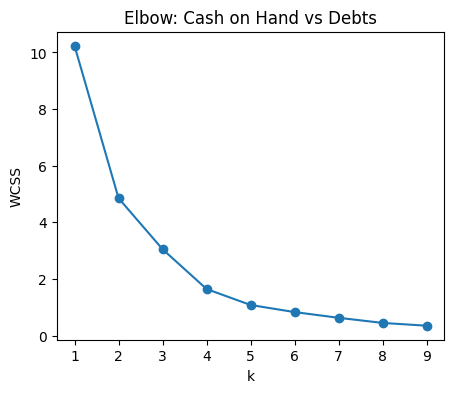

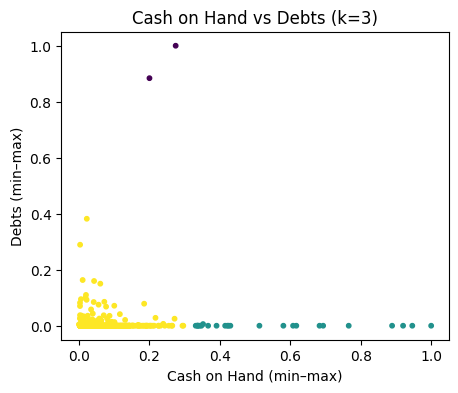

Name column not found; clusters listed by row index only.
Cluster 0 — size 2 | rows: [133, 442]
Cluster 1 — size 24 | rows: [2, 11, 45, 89, 112, 239, 247, 261, 267, 274, 290, 298, 303, 310, 328, 340, 384, 412, 414, 417, 423, 488, 500, 506]


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd

xy2 = work[["Cash on Hand","Debts"]].dropna()
scaler2 = MinMaxScaler()
X2 = scaler2.fit_transform(xy2)

# scree (WCSS)
Ks = range(1, 10)
wcss2 = []
for k in Ks:
    wcss2.append(KMeans(n_clusters=k, n_init=10, random_state=0).fit(X2).inertia_)

plt.figure(figsize=(5,4))
plt.plot(list(Ks), wcss2, marker="o")
plt.xlabel("k"); plt.ylabel("WCSS"); plt.title("Elbow: Cash on Hand vs Debts")
plt.show()

k_cd = 3

km2 = KMeans(n_clusters=k_cd, n_init=10, random_state=0).fit(X2)
labels2 = km2.labels_

plt.figure(figsize=(5,4))
plt.scatter(X2[:,0], X2[:,1], c=labels2, s=10)
plt.xlabel("Cash on Hand (min–max)"); plt.ylabel("Debts (min–max)")
plt.title(f"Cash on Hand vs Debts (k={k_cd})")
plt.show()

# list politicians in the two smallest clusters
label_s2 = pd.Series(labels2, index=xy2.index, name="cluster")
sizes2 = label_s2.value_counts().sort_values()
smallest_two2 = list(sizes2.index[:2])

if "Name" in work.columns:
    name_series = work["Name"].astype(str)
    for cid in smallest_two2:
        idx = label_s2.index[label_s2 == cid]
        members = name_series.reindex(idx).dropna().tolist()
        print(f"Cluster {cid} — size {len(members)}")
        for m in members:
            print(" -", m)
else:
    print("Name column not found; clusters listed by row index only.")
    for cid in smallest_two2:
        idx = label_s2.index[label_s2 == cid]
        print(f"Cluster {cid} — size {len(idx)} | rows: {list(idx)}")

The scree plot showed a clear elbow at k ≈ 3, so I used k=3. The scatterplot of Cash on Hand vs Debts splits candidates into: a large low-cash/low-debt group, a mid-tier group, and a tiny set of outliers with very high Debts. The list of politicians that comprise the two smallest clusters is shown above.
The pattern between part 2/3 is similar because both are k ≈ 3, but the makeup of the small clusters shifts. In Part 2 (Raised/Spent), the two smallest clusters are the very high raise/spend outliers. In Part 3 (Cash on Hand/Debts), the two smallest clusters are high-debt outliers while most candidates sit near low cash/low debt. This is probably because debts are sparse and heavy-tailed, so k-means turns those extremes into tiny clusters.

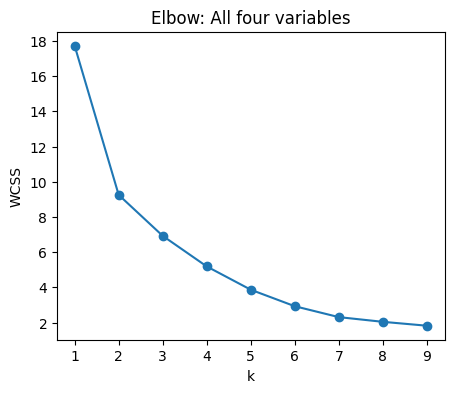

0    502
1      2
2     30
3      3
Name: count, dtype: int64


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd

all4 = work[["Raised","Spent","Cash on Hand","Debts"]].dropna()
scaler4 = MinMaxScaler()
X4 = scaler4.fit_transform(all4)

Ks = range(1, 10)
wcss4 = []
for k in Ks:
    wcss4.append(KMeans(n_clusters=k, n_init=10, random_state=0).fit(X4).inertia_)

plt.figure(figsize=(5,4))
plt.plot(list(Ks), wcss4, marker="o")
plt.xlabel("k"); plt.ylabel("WCSS"); plt.title("Elbow: All four variables")
plt.show()

k_all = 4  # from the elbow

km_all = KMeans(n_clusters=k_all, n_init=10, random_state=0).fit(X4)
lab_all = km_all.labels_
print(pd.Series(lab_all).value_counts().sort_index())

Parts 2 and 3 both show an elbow at k = 3 with a large baseline cluster, a mid-tier cluster, and a tiny outlier cluster (high Raised/Spent in Part 2 vs high Debts in Part 3). With all four variables, the scree plot bends at k = 4 and the cluster counts split into one large cluster, one medium cluster, and two very small outlier clusters, separating the high-money and high-debt extremes.

Yes. The four centers outline distinctive profiles. Baseline campaigns (~$2.3M raised/$1.8M spent, low debt), well-funded low-debt campaigns (~$17.5M/$13.4M, ~$10M cash), high-debt campaigns (~$20.3M/$15.3M with ~$12.5M debt), and mega-funded no-debt outliers (~$74.8M/$65.4M, ~$14.2M cash). These separations are useful for comparing financing strategies.